In [25]:
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw
from PIL import ExifTags
from tkinter import filedialog
import sys

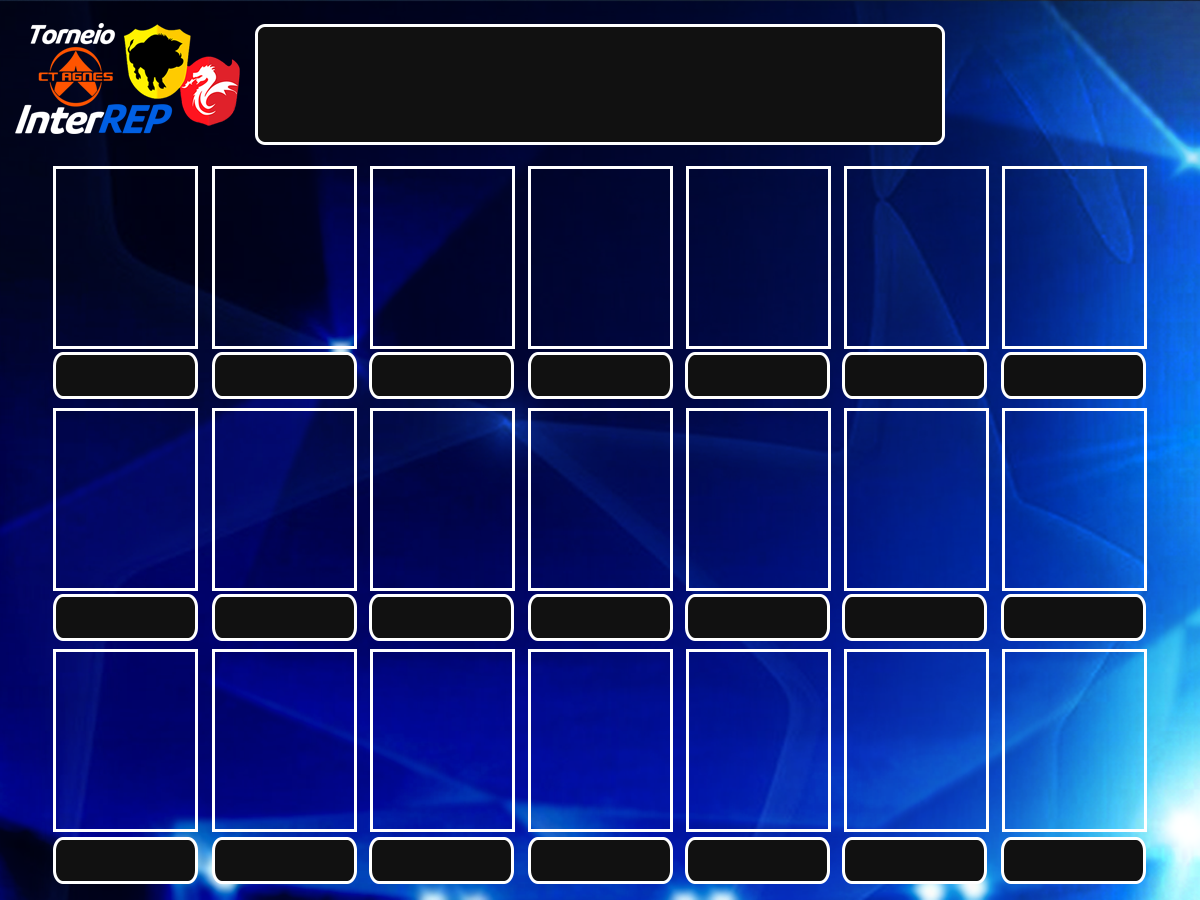

In [26]:
#Open background image
background = Image.open("albumExemplo.png")

#Show background image
display(background)

In [27]:
def draw_rep_info(background, republic_name, republic_logo):
#On a square area inside background, we will put the republic name
#The square area is defined by the following coordinates (266,31) to (936,140)
#The coordinates are (x,y) where x is the horizontal position and y is the vertical position
    area = (266,31,936,140)
    #Fill area with (7,7,7)
    background.paste((11,11,11),area)
    #We will use the font "Arial" with size 100
    font = ImageFont.truetype("Arial.TTF", 75)

    draw = ImageDraw.Draw(background)
    #Remove "República " from the name
    
    text = republic_name.replace('República ','')
    text = text.replace('Republica','')
    text = text.replace('republica','')

    text_width, text_height = ImageDraw.Draw(background).textsize(text, font)

    x = (area[0] + area[2] - text_width) / 2
    y = (area[1] + area[3] - text_height) / 2
    # draw the text
    ImageDraw.Draw(background).text((x, y), text, fill=(255, 255, 255), font=font)
    
    
    
    area = (1001,14,1142, 155)
    # Cut the republic logo to fit the area
    # if the logo is bigger on the horizontal, we will resize it to fit the area
    aspect_ratio = republic_logo.width/republic_logo.height
    new_height = area[3]-area[1]
    new_width = new_height*aspect_ratio
    print(republic_logo.size)
    print(new_width, new_height)
    republic_logo = republic_logo.resize((int(new_width),int(new_height)), Image.Resampling.LANCZOS)
    
    
    
    #Paste the logo centered on the area on the background
    x = area[0] + (area[2]-area[0]-republic_logo.width)//2
    y = area[1] + (area[3]-area[1]-republic_logo.height)//2
    
    if republic_logo.mode != 'RGBA':
        republic_logo = republic_logo.convert('RGBA')
    if(republic_logo.mode == 'RGBA'):
        #Paste the logo on the background, respecting the alpha channel
        background.paste(republic_logo,box=(x,y,x+republic_logo.width, y+republic_logo.height), mask=republic_logo.split()[3])
    
    else:
        #Paste the logo on the background, without respecting the alpha channel
        background.paste(republic_logo,box=(x,y,x+republic_logo.width, y+republic_logo.height))

    return background

In [28]:
def draw_rep_players(background, images_list, names_list):
    #Draw 21 squares in the areas:
    # (57, 170) to (194, 346)
    # Add 158 to x until 7 squares are drawn
    # reset x to 57
    # Add 241 to y
    # Add 158 to x until 7 squares are drawn
    # reset x to 57
    # Add 241 to y
    # Add 158 to x until 7 squares are drawn
    x = 57
    y = 170
    x_end = 195
    y_end = 346
    
    frame_aspect_ratio = (x_end-x)/(y_end-y)

    for i in range(0,len(images_list)):
        player_image = images_list[i]
        
        area = (x,y,x_end,y_end)
        aspect_ratio = player_image.width/player_image.height
        if(aspect_ratio < frame_aspect_ratio):
            new_width = x_end-x
            new_height = new_width/aspect_ratio
        else:
            new_height = y_end-y
            new_width = new_height*aspect_ratio
        
        resized_image = player_image.resize((int(new_width),int(new_height)), resample=Image.Resampling.LANCZOS)
        
        if new_width > area[2]-area[0]:
            excess_width = new_width - (area[2]-area[0])
            resized_image = resized_image.crop((excess_width/2,0,new_width-excess_width/2,new_height))
        if new_height > area[3]-area[1]:
            excess_height = new_height - (area[3]-area[1])
            resized_image = resized_image.crop((0,excess_height/2,new_width,new_height-excess_height/2))
        
    
        x_draw = area[0] + (area[2]-area[0]-resized_image.width)//2
        y_draw = area[1] + (area[3]-area[1]-resized_image.height)//2
    
        background.paste(resized_image,(x_draw,y_draw))
        
        x = x + 158
        x_end = x_end + 158
        if x > 57 + 158*6:
            x = 57
            x_end = 195
            y = y + 241
            y_end = y_end + 241

    #Draw 21 names in the areas:
    # (57, 170) to (194, 346)
    # Add 158 to x until 7 squares are drawn
    # reset x to 57
    # Add 241 to y
    # Add 158 to x until 7 squares are drawn
    # reset x to 57
    # Add 241 to y
    # Add 158 to x until 7 squares are drawn
    x = 65
    y = 356
    x_end = 192 
    y_end = 395

    for i in range(0, len(names_list)):
        font = ImageFont.truetype("Arialbd.TTF", 16)
        area = (x,y,x_end,y_end)
        background.paste((11,11, 11),area)
        text = names_list[i]
        #if there is a " " in the name, replace if for a ( )
        if text.find('"') != -1:
            print("ENCONTRADO:", text)
            text = text.replace('"','(', 1)
            text = text.replace('"',')', 1)
        
        #if there isnt a ( in the name, insert it around the last name
        if text.find('(') == -1:
            name_list = text.split(' ')
            name_list = [x for x in name_list if x != '']
            text = ''
            for i in range(0,len(name_list)-1):
                text += name_list[i] + ' '
            text += '(' + name_list[-1] + ')'
        #Remove the middle name following the format "First Middle Last (Nickname)"
        nickname_start = text.find('(')
        nickame_end = text.find(')')
        nickname = text[nickname_start:nickame_end+1]
        name_no_nickname = text.replace(nickname,'')
        name_split = name_no_nickname.split(' ')
        name = name_split[0]
        #Pop any '' in the list
        name_split = [x for x in name_split if x != '']
        if(name_split[-1] == '+'):
            name_split.pop()
        if(name_split[-1] == '/'):
            name_split.pop()
        if(name_split[0] != name_split[-1]):
            name += ' ' + name_split[-1]
        text = name + nickname
        # when a ( is found, we will break the line
        text = text.replace('(','\n(')
        
        #if the lenght of the text is too long, we will reduce the font size
        if(len(text.split('\n')[0]) > 15 or len(text.split('\n')[1]) > 15):
            font = ImageFont.truetype("Arialbd.TTF", 14)
            if(len(text.split('\n')[0]) > 17 or len(text.split('\n')[1]) > 17):
                font = ImageFont.truetype("Arialbd.TTF", 13)
        text_width, text_height = ImageDraw.Draw(background).textsize(text, font)

        x_draw = (x + x_end - text_width) / 2
        y_draw = (y + y_end - text_height) / 2
        # draw the text
        ImageDraw.Draw(background).text((x_draw, y_draw), text, fill=(255, 255, 255), font=font, align='center')
        x = x + 158
        x_end = x_end + 158
        if x > 65 + 158*6:
            x = 65
            x_end = 192
            y = y + 242
            y_end = y_end + 242

    return background


In [29]:
import urllib
from wand.image import Image as WandImage
import io
image = Image.open("logoTrabisseiros.jpg")
fields = []
rows = []
republic_names = []
republic_images = []
republic_player_names = []
republic_player_images = []
with open("form.csv", 'r') as form:
    reader = csv.reader(form)
    fields = next(reader)
    
    for row in reader:
        rows.append(row)
        
    print("Total no. of rows: %d"%(reader.line_num))
print('Field names are:' + ', '.join(field for field in fields))
print("5 first rows")
for row in rows:
    republic_names.append(row[1])
    republic_image_name = row[2]
    republic_image_name = republic_image_name.split('/')[-1]
    republic_image_name = urllib.parse.unquote(republic_image_name)
    if(republic_image_name.find('.pdf')):
        #Load as pdf then convert to image
        republic_image = WandImage(filename="imagens/" + republic_image_name, resolution=200)
        republic_image = Image.open(io.BytesIO(republic_image.make_blob("png")))
        
    else:
        republic_image = Image.open("imagens/" + republic_image_name)
    republic_images.append(republic_image)
    player_names = []
    player_images = []
    #Append the goalkeeper first
    if(row[6] != ''):
        player_names.append(row[6] + " " + row[7])
        player_image_name = row[8]
        player_image_name = player_image_name.split('/')[-1]
        player_image_name = urllib.parse.unquote(player_image_name)
        player_image = Image.open("imagens/" + player_image_name)
        player_images.append(player_image)
    for i in range(10,69, 3):
        if(row[i] != ''):
            player_names.append(row[i] + " " + row[i+1])
            player_image_name = row[i+2]
            player_image_name = player_image_name.split('/')[-1]
            player_image_name = urllib.parse.unquote(player_image_name)
            player_image_name = "imagens/" + player_image_name
            try:
                player_image = Image.open(player_image_name)
            except:
                print("Erro ao abrir imagem: ", player_image_name)
                print("Nome do jogador: ", row[i] + " " + row[i+1])
                print("Nome da republica: ", row[1])
                exit()
            player_images.append(player_image)
            
    republic_player_names.append(player_names)
    republic_player_images.append(player_images)
print(republic_names)

Total no. of rows: 32
Field names are:Submission Date, Nome da república, Logo da República, Número de jogadores, Telefone de dois responsáveis, Telefone, Nome do goleiro + (apelido), Último nome do goleiro, upload da foto do goleiro, O jogador agregado é um goleiro?, nome do agregado + (apelido), Último nome do agregado, foto do agregado, Nome do jogador 1 + (Apelido), Último nome do jogador 1, upload da foto do jogador 1, Nome do jogador 2 + (apelido), Último nome do jogador 2, upload da foto do jogador 2, Nome do jogador 3 + (apelido), Último nome do jogador 3, upload da foto do jogador 3, Nome do jogador 4 + (apelido), Último nome do jogador 4, upload da foto do jogador 4, Nome do jogador 5 + (apelido), Último nome do jogador 5, upload da foto do jogador 5, Nome do jogador 6 + (apelido), Último nome do jogador 6, upload da foto do jogador 6, Nome do jogador 7 + (apelido), Último nome do jogador 7, upload da foto do jogador 7, Nome do jogador 8 + (apelido), Último nome do jogador 8,

/home/matheus/Documents/scripts/.venv/lib/python3.11/site-packages/PIL/Image.py:3176: DecompressionBombWarning: Image size (93581670 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


['República Cabañas', 'República Casa do Caralho', 'República Várzea ', 'República Arapuca', 'Irmãos Metralha', 'República Mau Exemplo', 'República Preguiça ', 'Berlim', 'Mão de Onze', 'República Tio', 'Rep Em Brasa', 'República Malibu ', 'Deus Ta Vendo', 'República Boi Soberano', 'República Poltergeist', 'Santa Casa', 'Paratudo', 'Cheese', 'TipoZero', 'República Matadouro', 'Open Beach', 'Zero Bala', '29', 'Fogo de Paia', 'Amigos do Peito', 'República Bob Nelson', 'XV Arrobas', 'Boate Azul', 'República Aruêra', 'Oligarquia ', 'republica Canta Grillo']


In [30]:
republic_albums = []
for i in range(0, len(republic_names)):
    republic_albums.append(background.copy())
    republic_albums[i] = draw_rep_info(republic_albums[i], republic_names[i], republic_images[i])
    republic_albums[i] = draw_rep_players(republic_albums[i], republic_player_images[i], republic_player_names[i])
    #Save the images in the folder albuns
    republic_albums[i].save("albuns/" + republic_names[i] + ".png")
#display(republic_albums[0])

# background = draw_rep_info(background, 'Trabisseiros', image)
# background = draw_rep_players(background, images_list, names_list)
# display(background)

(2211, 2303)
135.3673469387755 141


/tmp/ipykernel_22362/513927525.py:18: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py

(1024, 1024)
141.0 141


/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.

(1075, 971)
156.10195674562306 141


/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.

(720, 710)
142.98591549295773 141


/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.

(842, 890)
133.39550561797753 141


/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.

(475, 374)
179.07754010695186 141


/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.

(864, 864)
141.0 141


/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.

(762, 846)
127.0 141


/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.

(679, 500)
191.478 141


/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.

(255, 450)
79.89999999999999 141


/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.

(297, 541)
77.40665434380776 141


/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.

(596, 597)
140.76381909547737 141


/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.

(1010, 1010)
141.0 141


/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.

(1080, 1080)
141.0 141


/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.

(9794, 9555)
144.52684458398744 141
ENCONTRADO: José "Smili" Gotardo
ENCONTRADO: Tales "Jarvinho" Targa
ENCONTRADO: Heitor "Mijoliro" Campos
ENCONTRADO: João "Fuinha" Bartolo
ENCONTRADO: Matheus "Joshua" Repeke
ENCONTRADO: Jorge "Dani Bananinha" Mellega
ENCONTRADO: Leandro "Disfarce" Nogueira
ENCONTRADO: Bruno "Larva" Schiavinato
ENCONTRADO: Mateus "P14" Zonaro
ENCONTRADO: Lucas "Dora" Matheus
ENCONTRADO: Pedro "Arrego" Rodriguez
ENCONTRADO: Tomás "Fajuto" Conti
ENCONTRADO: Nicolas "Pererê" Guimarães
ENCONTRADO:  Felipe "Sempre" Zanin
ENCONTRADO: João "Abatido" Lara
ENCONTRADO: Pedro "Incapaz" Rissato
ENCONTRADO: Fabricio "Ryan" Luzzi
ENCONTRADO: Mateus "Dada" Iacovone


/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.

(1600, 1032)
218.6046511627907 141


/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.

(768, 768)
141.0 141


/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.

(377, 377)
141.0 141


/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.

(600, 600)
141.0 141


/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.

(1626, 2001)
114.57571214392804 141


/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.

(778, 706)
155.37960339943342 141


/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.

(720, 500)
203.04 141


/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.

(600, 470)
180.0 141


/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.

(1000, 1000)
141.0 141


/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.

(206, 166)
174.97590361445785 141


/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.

(2652, 2644)
141.4266263237519 141


/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.

(2070, 1667)
175.0869826034793 141


/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.

(703, 521)
190.2552783109405 141


/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.

(4080, 3400)
169.2 141


/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.

(398, 290)
193.5103448275862 141


/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.

(886, 650)
192.19384615384615 141


/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.py:110: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = ImageDraw.Draw(background).textsize(text, font)
/tmp/ipykernel_22362/1866999862.